In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [ ]:
data_df = pd.read_csv('/content/historical_weather.csv')

In [ ]:
data_df.head()

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0


<ipython-input-5-9c6f3ad5edfd>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_df.hist(ax = ax)


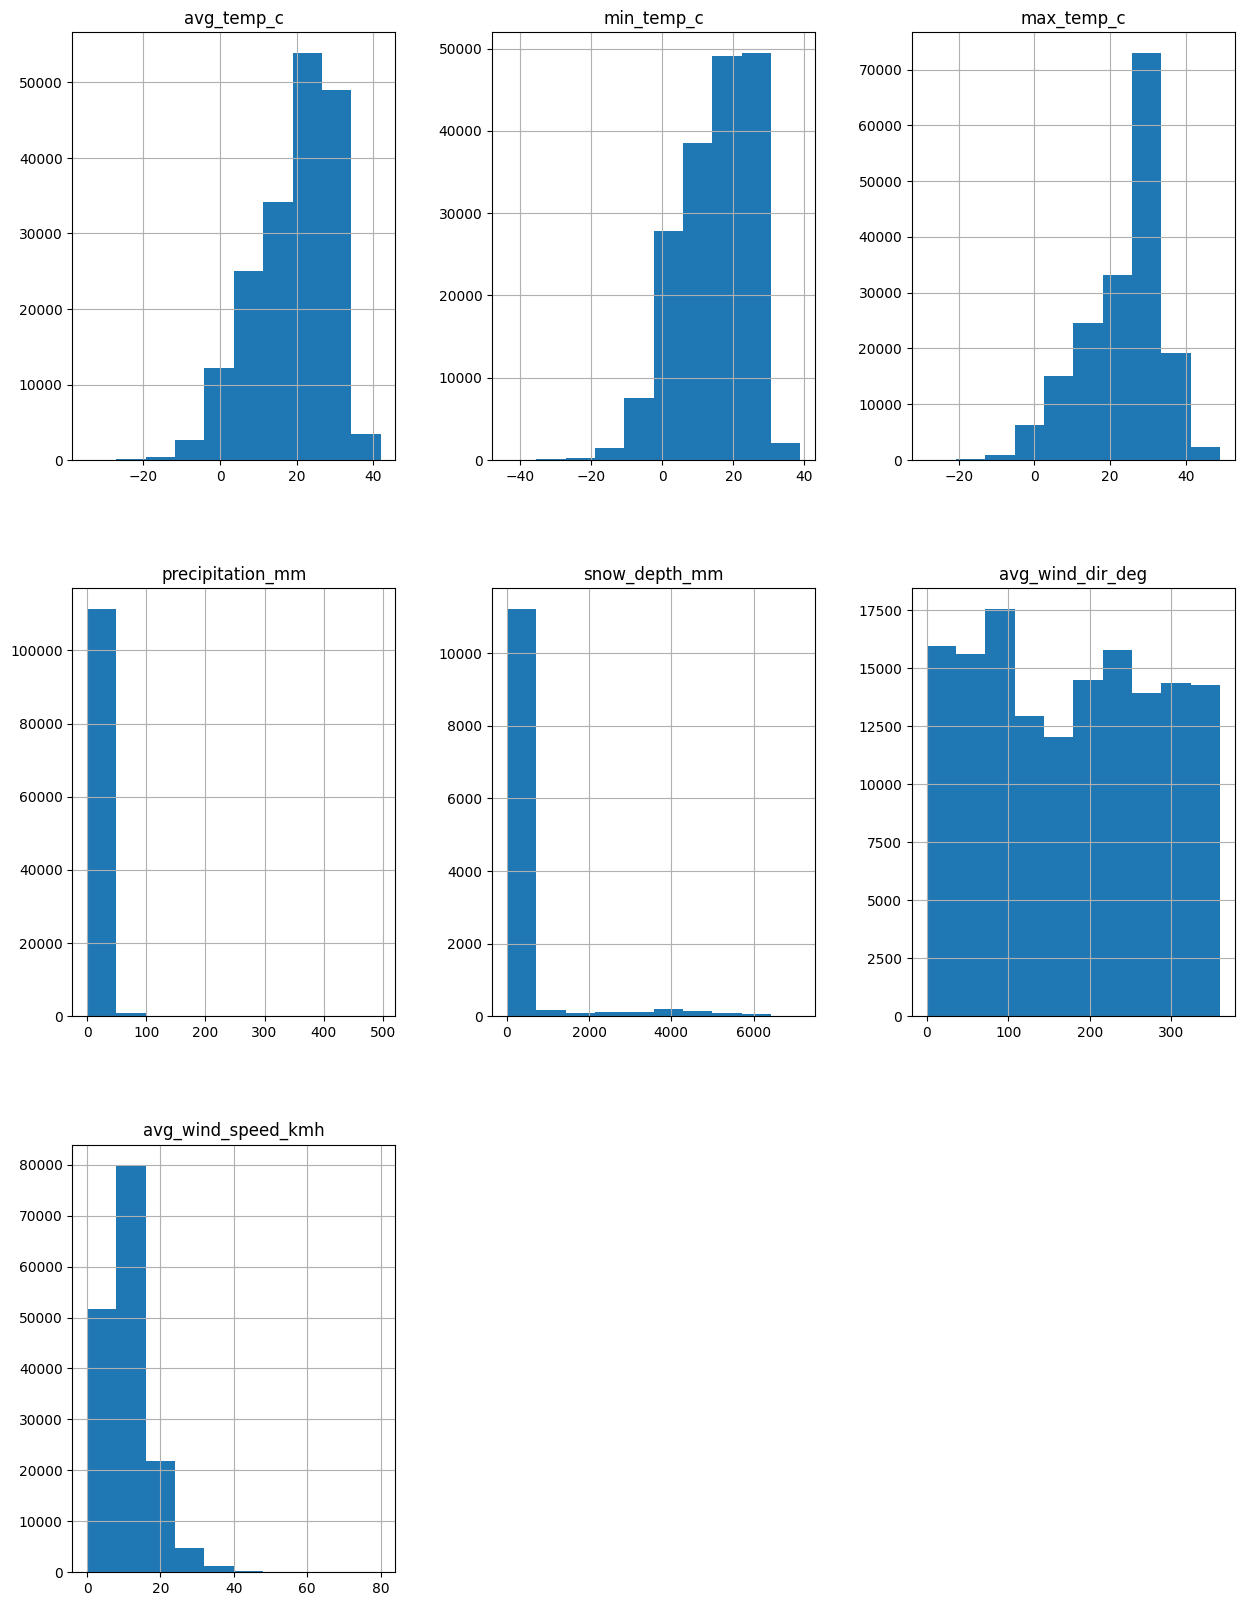

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_df.hist(ax = ax)
plt.show()

In [ ]:
# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'], format='%Y-%m-%d') # Changed the date format to match the data

# Check for NaN values in the 'city_id', 'date', and temperature-related columns
nan_summary = data_df[['city_id', 'date', 'avg_temp_c', 'min_temp_c', 'max_temp_c']].isna().sum()

nan_summary

city_id          0
date             0
avg_temp_c    1224
min_temp_c    5886
max_temp_c    7493
dtype: int64

In [ ]:
temp_c1 = data_df[data_df['city_id'] == 'C001']

In [ ]:
temp_c1.head(5)

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0


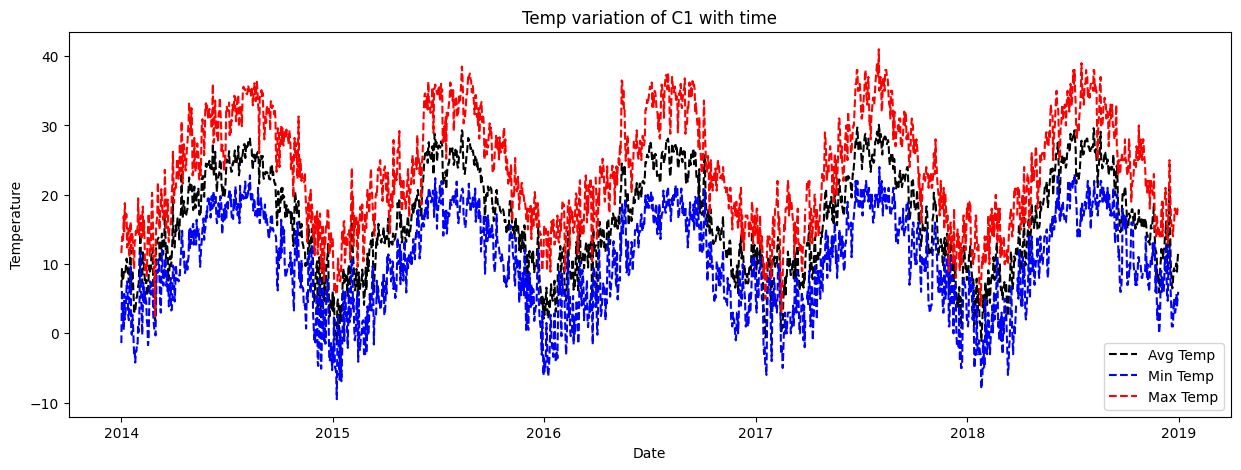

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(temp_c1['date'],temp_c1['avg_temp_c'],label='Avg Temp', linestyle='--', color='black')
plt.plot(temp_c1['date'], temp_c1['min_temp_c'], label='Min Temp', linestyle='--', color='blue')
plt.plot(temp_c1['date'], temp_c1['max_temp_c'], label='Max Temp', linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title('Temp variation of C1 with time')
plt.legend()
plt.show()

In [ ]:
# Keep rows that have 'avg_temp_c' or both 'min_temp_c' and 'max_temp_c' non-null using pd.concat instead of append
filtered_data_df = pd.concat([data_df.dropna(subset=['avg_temp_c']), data_df.dropna(subset=['min_temp_c', 'max_temp_c'])])

# Drop duplicate rows that might be included in both sets
filtered_data_df = filtered_data_df.drop_duplicates()

# Display the first few rows of the filtered dataframe
filtered_data_df.head()


,city_id,date,avg_temp_c,min_temp_c,max_temp_c,snow_depth_mm,avg_wind_speed_kmh
0,0,2014-01-01,6.6,-1.4,11.6,NaN,6.2
1,0,2014-01-02,9.3,6.3,13.3,NaN,10.0
2,0,2014-01-03,7.6,1.9,14.0,NaN,5.8
3,0,2014-01-04,7.6,3.9,13.3,NaN,11.3
4,0,2014-01-05,8.6,0.5,16.9,NaN,5.0


In [ ]:
data_df['avg_temp_c'] = data_df.apply(
    lambda row: (row['min_temp_c'] + row['max_temp_c']) / 2 if pd.isna(row['avg_temp_c']) and not pd.isna(row['min_temp_c']) and not pd.isna(row['max_temp_c']) else row['avg_temp_c'],
    axis=1
)

In [ ]:
data_df

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,snow_depth_mm,avg_wind_speed_kmh
0,0,2014-01-01,6.6,-1.4,11.6,NaN,6.2
1,0,2014-01-02,9.3,6.3,13.3,NaN,10.0
2,0,2014-01-03,7.6,1.9,14.0,NaN,5.8
3,0,2014-01-04,7.6,3.9,13.3,NaN,11.3
4,0,2014-01-05,8.6,0.5,16.9,NaN,5.0
...,...,...,...,...,...,...,...
182333,99,2018-12-27,22.0,15.9,27.9,NaN,13.2
182334,99,2018-12-28,21.9,14.9,28.2,NaN,12.6
182335,99,2018-12-29,22.4,16.3,28.2,NaN,14.2
182336,99,2018-12-30,21.6,18.5,26.6,NaN,17.0


In [ ]:
# Drop all rows without 'avg_temp_c'
data_df = data_df.dropna(subset=['avg_temp_c'])

# Display the first few rows of the cleaned dataframe
print(data_df.head())

  city_id       date  avg_temp_c  min_temp_c  max_temp_c  snow_depth_mm  \
0       0 2014-01-01         6.6        -1.4        11.6            NaN   
1       0 2014-01-02         9.3         6.3        13.3            NaN   
2       0 2014-01-03         7.6         1.9        14.0            NaN   
3       0 2014-01-04         7.6         3.9        13.3            NaN   
4       0 2014-01-05         8.6         0.5        16.9            NaN   

   avg_wind_speed_kmh  
0                 6.2  
1                10.0  
2                 5.8  
3                11.3  
4                 5.0  


In [ ]:
missing_avg_temp = data_df[data_df['avg_temp_c'].isna()]

# Count the number of such rows
missing_avg_count = missing_avg_temp.shape[0]

missing_avg_count

0

In [ ]:

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'], format='%Y-%m-%d')

# Create a complete date range from January 1, 2014, to December 31, 2018
complete_date_range = pd.date_range(start='2014-01-01', end='2018-12-31')

# Create a new DataFrame with a complete date range for each city
cities = data_df['city_id'].unique()
full_data = pd.DataFrame({
    'date': np.tile(complete_date_range, len(cities)),
    'city_id': np.repeat(cities, len(complete_date_range))
})

# Merge the full data with the original dataset
full_data = full_data.merge(data_df, on=['city_id', 'date'], how='left')

# Fill missing avg_temp_c values
full_data['avg_temp_c'] = full_data['avg_temp_c'].interpolate(method='linear')

# Ensure no NaN values remain by forward and backward filling
full_data['avg_temp_c'] = full_data['avg_temp_c'].fillna(method='bfill').fillna(method='ffill')

# Create a 2D array where each subarray represents the avg temperatures of each city
city_temp_array = []

for city in cities:
    city_data = full_data[full_data['city_id'] == city].sort_values('date')
    city_temp_array.append(city_data['avg_temp_c'].values)

# Convert the list to a 2D numpy array
city_temp_array = np.array(city_temp_array)

# Display the first few rows of the full_data DataFrame
print(full_data.head())

# Display the shape of the resulting array
print(city_temp_array.shape)

        date city_id  avg_temp_c  min_temp_c  max_temp_c  snow_depth_mm  \
0 2014-01-01       0         6.6        -1.4        11.6            NaN   
1 2014-01-02       0         9.3         6.3        13.3            NaN   
2 2014-01-03       0         7.6         1.9        14.0            NaN   
3 2014-01-04       0         7.6         3.9        13.3            NaN   
4 2014-01-05       0         8.6         0.5        16.9            NaN   

   avg_wind_speed_kmh  
0                 6.2  
1                10.0  
2                 5.8  
3                11.3  
4                 5.0  
(100, 1826)


In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the Sinusoidal Regressor
class SinusoidalRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, freq=1.0):
        self.freq = freq

    def fit(self, X, y):
        X = X.flatten()
        self.coef_ = np.polyfit(X, y, 1)
        return self

    def predict(self, X):
        X = X.flatten()
        return self.coef_[0] * np.sin(self.freq * X) + self.coef_[1]

class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2

    def fit(self, X_1, X_2, y):
        self.model_1.fit(X_1, y)
        y_fit = self.model_1.predict(X_1)
        y_resid = y - y_fit
        self.model_2.fit(X_2, y_resid)
        self.y_fit = y_fit
        self.y_resid = y_resid

    def predict(self, X_1, X_2):
        y_pred = self.model_1.predict(X_1)
        y_pred += self.model_2.predict(X_2)
        return y_pred

In [ ]:
# Use the city_temp_array created earlier
city_temps = city_temp_array[0]  # Use data from the first city
X = np.arange(len(city_temps)).reshape(-1, 1)
y = city_temps

# Split the data into training and testing sets
X_train, X_test = X[:1820], X[1820:]
y_train, y_test = y[:1820], y[1820:]

# Create the hybrid model
model = BoostedHybrid(
    model_1=SinusoidalRegressor(freq=0.01),  # Example frequency
    model_2=XGBRegressor(),
)

In [ ]:
# Train the model
model.fit(X_train, X_train, y_train)  # Note: X_train is used twice, as X_1 and X_2

# Predict the last 6 values
y_pred = model.predict(X_test, X_test)

In [ ]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Predicted values: {y_pred}')
print(f'Actual values: {y_test}')
print(f'RMSE: {rmse}')

Predicted values: [9.25142019 9.25142452 9.25142888 9.25143326 9.25143768 9.25144213]
Actual values: [ 9.4  9.7 10.1  8.9 10.7 11.8]
RMSE: 1.2688810157532195
